In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
from sklearn import preprocessing
import pylab as pl

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
credits= pd.read_csv('tmdb_5000_credits.csv')
credits.rename(columns=lambda x: x.strip(), inplace=True)
movies = pd.read_csv('tmdb_5000_movies.csv')
movies.rename(columns=lambda x: x.strip(), inplace=True)

In [5]:
credits.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [6]:
movies.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [7]:
movies['genres']=movies['genres'].apply(json.loads)
for index,i in zip(movies.index,movies['genres']):
    list1=[]
    for j in range(len(i)):
        list1.append((i[j]['name']))# the key 'name' contains the name of the genre
    movies.loc[index,'genres']=str(list1)
    
movies['keywords']=movies['keywords'].apply(json.loads)
for index,i in zip(movies.index,movies['keywords']):
    list1=[]
    for j in range(len(i)):
        list1.append((i[j]['name']))
    movies.loc[index,'keywords']=str(list1)
    
movies['production_companies']=movies['production_companies'].apply(json.loads)
for index,i in zip(movies.index,movies['production_companies']):
    list1=[]
    for j in range(len(i)):
        list1.append((i[j]['name']))
    movies.loc[index,'production_companies']=str(list1)
    
movies['production_countries']=movies['production_countries'].apply(json.loads)
for index,i in zip(movies.index,movies['production_countries']):
    list1=[]
    for j in range(len(i)):
        list1.append((i[j]['iso_3166_1']))
    movies.loc[index,'production_countries']=str(list1)

movies['spoken_languages']=movies['spoken_languages'].apply(json.loads)
for index,i in zip(movies.index,movies['spoken_languages']):
    list1=[]
    for j in range(len(i)):
        list1.append((i[j]['iso_639_1']))
    movies.loc[index,'spoken_languages']=str(list1)
    
credits['cast']=credits['cast'].apply(json.loads)
for index,i in zip(credits.index,credits['cast']):
    list1=[]
    for j in range(len(i)):
        list1.append((i[j]['name']))
    credits.loc[index,'cast']=str(list1)

credits['crew']=credits['crew'].apply(json.loads)
def director(x):
    for i in x:
        if i['job'] == 'Director':
            return i['name']
credits['crew']=credits['crew'].apply(director)
credits.rename(columns={'crew':'director'},inplace=True)

In [8]:
movies=movies.merge(credits,left_on='id',right_on='movie_id',how='left')

In [9]:
movies.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title_x,vote_average,vote_count,movie_id,title_y,cast,director
0,237000000,"['Action', 'Adventure', 'Fantasy', 'Science Fi...",http://www.avatarmovie.com/,19995,"['culture clash', 'future', 'space war', 'spac...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"['Ingenious Film Partners', 'Twentieth Century...","['US', 'GB']",2009-12-10,2787965087,162.0,"['en', 'es']",Released,Enter the World of Pandora.,Avatar,7.2,11800,19995,Avatar,"['Sam Worthington', 'Zoe Saldana', 'Sigourney ...",James Cameron
1,300000000,"['Adventure', 'Fantasy', 'Action']",http://disney.go.com/disneypictures/pirates/,285,"['ocean', 'drug abuse', 'exotic island', 'east...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"['Walt Disney Pictures', 'Jerry Bruckheimer Fi...",['US'],2007-05-19,961000000,169.0,['en'],Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,285,Pirates of the Caribbean: At World's End,"['Johnny Depp', 'Orlando Bloom', 'Keira Knight...",Gore Verbinski
2,245000000,"['Action', 'Adventure', 'Crime']",http://www.sonypictures.com/movies/spectre/,206647,"['spy', 'based on novel', 'secret agent', 'seq...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"['Columbia Pictures', 'Danjaq', 'B24']","['GB', 'US']",2015-10-26,880674609,148.0,"['fr', 'en', 'es', 'it', 'de']",Released,A Plan No One Escapes,Spectre,6.3,4466,206647,Spectre,"['Daniel Craig', 'Christoph Waltz', 'Léa Seydo...",Sam Mendes
3,250000000,"['Action', 'Crime', 'Drama', 'Thriller']",http://www.thedarkknightrises.com/,49026,"['dc comics', 'crime fighter', 'terrorist', 's...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"['Legendary Pictures', 'Warner Bros.', 'DC Ent...",['US'],2012-07-16,1084939099,165.0,['en'],Released,The Legend Ends,The Dark Knight Rises,7.6,9106,49026,The Dark Knight Rises,"['Christian Bale', 'Michael Caine', 'Gary Oldm...",Christopher Nolan
4,260000000,"['Action', 'Adventure', 'Science Fiction']",http://movies.disney.com/john-carter,49529,"['based on novel', 'mars', 'medallion', 'space...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,['Walt Disney Pictures'],['US'],2012-03-07,284139100,132.0,['en'],Released,"Lost in our world, found in another.",John Carter,6.1,2124,49529,John Carter,"['Taylor Kitsch', 'Lynn Collins', 'Samantha Mo...",Andrew Stanton


In [10]:
movies['profit_per']= round(abs(movies['budget']-movies['revenue'])/movies['budget']*100)

In [11]:
movies = movies[(movies['vote_average']!=0)]

In [12]:
movies2 = movies[(movies['budget']!=0) & (movies['revenue']!=0)].copy().reset_index()

In [13]:
movies2.tail()

,index,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title_x,vote_average,vote_count,movie_id,title_y,cast,director,profit_per
3222,4773,27000,['Comedy'],http://www.miramax.com/movie/clerks/,2292,"['salesclerk', 'loser', 'aftercreditsstinger']",en,Clerks,Convenience and video store clerks Dante and R...,19.748658,"['Miramax Films', 'View Askew Productions']",['US'],1994-09-13,3151130,92.0,['en'],Released,Just because they serve you doesn't mean they ...,Clerks,7.4,755,2292,Clerks,"[""Brian O'Halloran"", 'Jeff Anderson', 'Jason M...",Kevin Smith,11571.0
3223,4788,12000,"['Horror', 'Comedy', 'Crime']",NaN,692,"['gay', 'trailer park', 'pop culture', 'drug d...",en,Pink Flamingos,Notorious Baltimore criminal and underground f...,4.553644,['Dreamland Productions'],['US'],1972-03-12,6000000,93.0,['en'],Released,An exercise in poor taste.,Pink Flamingos,6.2,110,692,Pink Flamingos,"['Divine', 'David Lochary', 'Mary Vivian Pearc...",John Waters,49900.0
3224,4792,20000,"['Crime', 'Horror', 'Mystery', 'Thriller']",NaN,36095,"['japan', 'prostitute', 'hotel', 'based on nov...",ja,キュア,A wave of gruesome murders is sweeping Tokyo. ...,0.212443,['Daiei Studios'],['JP'],1997-11-06,99000,111.0,['ja'],Released,Madness. Terror. Murder.,Cure,7.4,63,36095,Cure,"['Koji Yakusho', 'Masato Hagiwara', 'Tsuyoshi ...",Kiyoshi Kurosawa,395.0
3225,4796,7000,"['Science Fiction', 'Drama', 'Thriller']",http://www.primermovie.com,14337,"['distrust', 'garage', 'identity crisis', 'tim...",en,Primer,Friends/fledgling entrepreneurs invent a devic...,23.307949,['Thinkfilm'],['US'],2004-10-08,424760,77.0,['en'],Released,What happens if it actually works?,Primer,6.9,658,14337,Primer,"['Shane Carruth', 'David Sullivan', 'Casey Goo...",Shane Carruth,5968.0
3226,4798,220000,"['Action', 'Crime', 'Thriller']",NaN,9367,"['united states–mexico barrier', 'legs', 'arms...",es,El Mariachi,El Mariachi just wants to play his guitar and ...,14.269792,['Columbia Pictures'],"['MX', 'US']",1992-09-04,2040920,81.0,['es'],Released,"He didn't come looking for trouble, but troubl...",El Mariachi,6.6,238,9367,El Mariachi,"['Carlos Gallardo', 'Jaime de Hoyos', 'Peter M...",Robert Rodriguez,828.0


In [14]:
movies2['success'] = movies2['profit_per'].apply(lambda x: 1 if x > 100 else 0)

In [15]:
def cleanData(x):
    movies2[x]=movies2[x].str.strip('[]').str.replace(' ','').str.replace("'",'')
    movies2[x]=movies2[x].str.split(',')


In [16]:
cleanData('genres')
cleanData('keywords')
cleanData('production_countries')
cleanData('production_companies')
cleanData('spoken_languages')
cleanData('cast')

In [17]:
def valList(x):
    List = []
    for index, row in movies2.iterrows():
        vals = row[x]
        
        for val in vals:
            if val not in List:
                List.append(val)
    return List     

In [18]:
genreList = valList('genres')
kwordList = valList('keywords')
prodCtryList = valList('production_countries')
prodCpanyList = valList('production_companies')
langList = valList('spoken_languages')
castList = valList('cast')

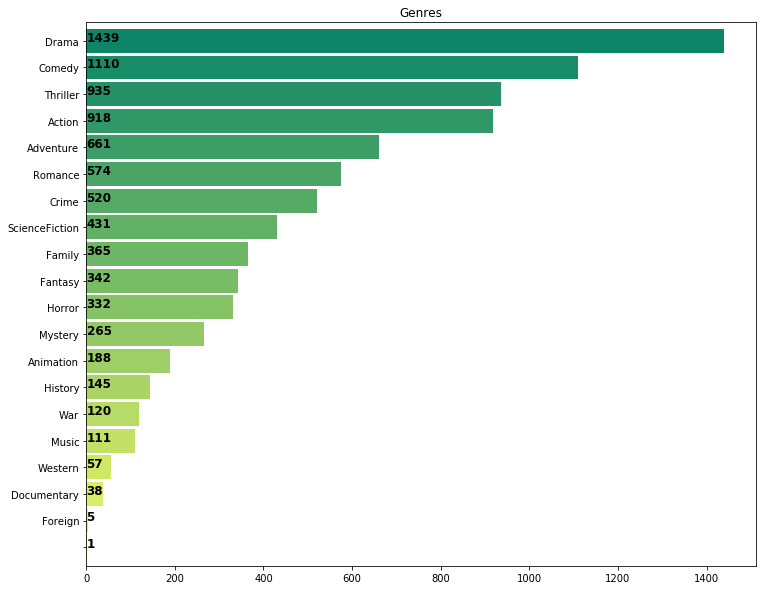

In [19]:
plt.subplots(figsize=(12,10))
list1=[]
for i in movies2['genres']:
    list1.extend(i)
ax=pd.Series(list1).value_counts().sort_values(ascending=True).plot.barh(width=0.9,color=sns.color_palette('summer_r',20))
for i, v in enumerate(pd.Series(list1).value_counts()[:20].sort_values(ascending=True).values): 
    ax.text(.8, i, v,fontsize=12,color='black',weight='bold')
plt.title('Genres')
plt.show()

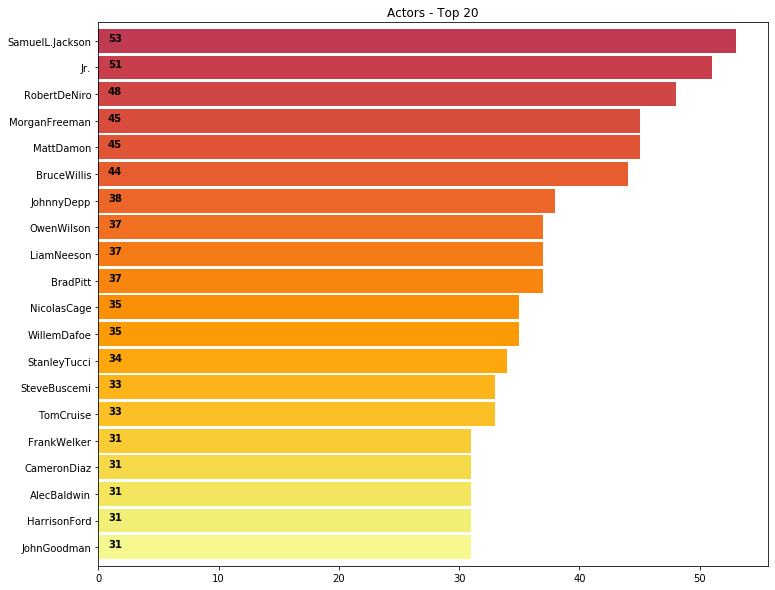

In [20]:
plt.subplots(figsize=(12,10))
list1=[]
for i in movies2['cast']:
    list1.extend(i)
ax=pd.Series(list1).value_counts()[:20].sort_values(ascending=True).plot.barh(width=0.9,color=sns.color_palette('inferno_r',40))
for i, v in enumerate(pd.Series(list1).value_counts()[:20].sort_values(ascending=True).values): 
    ax.text(.8, i, v,fontsize=10,color='black',weight='bold')
plt.title('Actors - Top 20')
plt.show()

In [21]:
def binary(x,xlist):
    binaryList = []
   
    for list2 in xlist:
        
        if list2 in x:
            binaryList.append(1)
        else:
            binaryList.append(0)
    
    return binaryList

In [22]:
movies2['gen_bin'] = movies2['genres'].apply(lambda x: binary(x,genreList))
movies2['kword_bin'] = movies2['keywords'].apply(lambda x: binary(x,kwordList))
movies2['prodCtry_bin'] = movies2['production_countries'].apply(lambda x: binary(x,prodCtryList))
movies2['prodCpany_bin'] = movies2['production_companies'].apply(lambda x: binary(x,prodCpanyList))
movies2['lang_bin'] = movies2['spoken_languages'].apply(lambda x: binary(x,langList))
movies2['cast_bin'] = movies2['cast'].apply(lambda x: binary(x,castList))

In [23]:
movies2.head()

,index,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title_x,vote_average,vote_count,movie_id,title_y,cast,director,profit_per,success,gen_bin,kword_bin,prodCtry_bin,prodCpany_bin,lang_bin,cast_bin
0,0,237000000,"[Action, Adventure, Fantasy, ScienceFiction]",http://www.avatarmovie.com/,19995,"[cultureclash, future, spacewar, spacecolony, ...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[IngeniousFilmPartners, TwentiethCenturyFoxFil...","[US, GB]",2009-12-10,2787965087,162.0,"[en, es]",Released,Enter the World of Pandora.,Avatar,7.2,11800,19995,Avatar,"[SamWorthington, ZoeSaldana, SigourneyWeaver, ...",James Cameron,1076.0,1,"[1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
1,1,300000000,"[Adventure, Fantasy, Action]",http://disney.go.com/disneypictures/pirates/,285,"[ocean, drugabuse, exoticisland, eastindiatrad...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[WaltDisneyPictures, JerryBruckheimerFilms, Se...",[US],2007-05-19,961000000,169.0,[en],Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,285,Pirates of the Caribbean: At World's End,"[JohnnyDepp, OrlandoBloom, KeiraKnightley, Ste...",Gore Verbinski,220.0,1,"[1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,2,245000000,"[Action, Adventure, Crime]",http://www.sonypictures.com/movies/spectre/,206647,"[spy, basedonnovel, secretagent, sequel, mi6, ...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[ColumbiaPictures, Danjaq, B24]","[GB, US]",2015-10-26,880674609,148.0,"[fr, en, es, it, de]",Released,A Plan No One Escapes,Spectre,6.3,4466,206647,Spectre,"[DanielCraig, ChristophWaltz, LéaSeydoux, Ralp...",Sam Mendes,259.0,1,"[1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, ...","[1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,3,250000000,"[Action, Crime, Drama, Thriller]",http://www.thedarkknightrises.com/,49026,"[dccomics, crimefighter, terrorist, secretiden...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[LegendaryPictures, WarnerBros., DCEntertainme...",[US],2012-07-16,1084939099,165.0,[en],Released,The Legend Ends,The Dark Knight Rises,7.6,9106,49026,The Dark Knight Rises,"[ChristianBale, MichaelCaine, GaryOldman, Anne...",Christopher Nolan,334.0,1,"[1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, ...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,4,260000000,"[Action, Adventure, ScienceFiction]",http://movies.disney.com/john-carter,49529,"[basedonnovel, mars, medallion, spacetravel, p...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,[WaltDisneyPictures],[US],2012-03-07,284139100,132.0,[en],Released,"Lost in our world, found in another.",John Carter,6.1,2124,49529,John Carter,"[TaylorKitsch, LynnCollins, SamanthaMorton, Wi...",Andrew Stanton,9.0,0,"[1, 1

In [24]:
movies3=movies2[['original_title','popularity', 'vote_average', 'vote_count', 'gen_bin','kword_bin','prodCtry_bin','prodCpany_bin','lang_bin','cast_bin','profit_per','success']].copy()

In [25]:
def split_arr(arr, n_splits): 
      
    # looping till length l 
    for i in range(0, len(arr), n_splits):  
        yield arr[i:i + n_splits] 

def find_concentration(arr, n): # n is the number of concentration points to find
    #seperate array into batches
    batches = list(split_arr(arr,int(len(arr)/n)))
    concentrations = []
    for i in range(len(batches)):
        point = 0
        num_ones = 0
        for j in range(len(batches[i])):
            if batches[i][j] == 1:
                point += j + (i * int(len(arr)/n)) # adding correction for batches
                num_ones += 1
        if num_ones > 0:
            point = point/num_ones
            concentrations.append((point,num_ones))
    return concentrations

In [26]:
def to_concentrations(df, feature_names,n):
    i=0
    for feature_name in feature_names:
        print('feature: ', feature_name)
        df[feature_name] = df[feature_name].apply(lambda x: find_concentration(x,n[i]))
        i=i+1
    return df

In [27]:
movies3 = to_concentrations(movies3, ['gen_bin',
                                      'kword_bin',
                                                      'prodCtry_bin',
                                                      'prodCpany_bin',
                                                      'lang_bin',
                                                      'cast_bin'                                 
                                                       ],[5,100,10,100,10,100]
                                    )

feature:  gen_bin
feature:  kword_bin
feature:  prodCtry_bin
feature:  prodCpany_bin
feature:  lang_bin
feature:  cast_bin


In [28]:
movies3.head()

,original_title,popularity,vote_average,vote_count,gen_bin,kword_bin,prodCtry_bin,prodCpany_bin,lang_bin,cast_bin,profit_per,success
0,Avatar,150.437577,7.2,11800,"[(1.5, 4)]","[(10.0, 21)]","[(0.5, 2)]","[(1.5, 4)]","[(0.5, 2)]","[(41.0, 83)]",1076.0,1
1,Pirates of the Caribbean: At World's End,139.082615,6.9,4500,"[(1.0, 3)]","[(28.5, 16)]","[(0.0, 1)]","[(5.0, 3)]","[(0.0, 1)]","[(99.0, 33)]",220.0,1
2,Spectre,107.376788,6.3,4466,"[(0.5, 2), (4.0, 1)]","[(40.0, 7)]","[(0.5, 2)]","[(8.0, 3)]","[(2.0, 5)]","[(155.73493975903614, 83)]",259.0,1
3,The Dark Knight Rises,112.312950,7.6,9106,"[(0.0, 1), (5.0, 3)]","[(54.0, 21)]","[(0.0, 1)]","[(11.5, 4)]","[(0.0, 1)]","[(274.9240506329114, 158)]",334.0,1
4,John Carter,43.926995,6.1,2124,"[(1.3333333333333333, 3)]","[(57.375, 16)]","[(0.0, 1)]","[(4.0, 1)]","[(0.0, 1)]","[(368.0, 27)]",9.0,0


In [29]:
def w_avg(arr):
    weight = 0 #weight
    s = 0 # position*weight
    for element in arr:
        s += (element[0] * element[1])
        weight += element[1]
    return s/weight #weighted average

In [30]:
def to_weighted_avg(df, feature_names):
    for feature_name in feature_names:
        print('Current: ', feature_name)
        df[feature_name] = df[feature_name].apply(lambda x: w_avg(x))
    return df

In [31]:
movies3 = to_weighted_avg(movies3, ['gen_bin',
                                                      'kword_bin',
                                                      'prodCtry_bin',
                                                      'prodCpany_bin',
                                                      'lang_bin',
                                                      'cast_bin'
                                                     ])

Current:  gen_bin
Current:  kword_bin
Current:  prodCtry_bin
Current:  prodCpany_bin
Current:  lang_bin
Current:  cast_bin


In [32]:
movies3.head()

,original_title,popularity,vote_average,vote_count,gen_bin,kword_bin,prodCtry_bin,prodCpany_bin,lang_bin,cast_bin,profit_per,success
0,Avatar,150.437577,7.2,11800,1.500000,10.000,0.5,1.5,0.5,41.000000,1076.0,1
1,Pirates of the Caribbean: At World's End,139.082615,6.9,4500,1.000000,28.500,0.0,5.0,0.0,99.000000,220.0,1
2,Spectre,107.376788,6.3,4466,1.666667,40.000,0.5,8.0,2.0,155.734940,259.0,1
3,The Dark Knight Rises,112.312950,7.6,9106,3.750000,54.000,0.0,11.5,0.0,274.924051,334.0,1
4,John Carter,43.926995,6.1,2124,1.333333,57.375,0.0,4.0,0.0,368.000000,9.0,0


C:\Users\natalia.avendano.pr1\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)
C:\Users\natalia.avendano.pr1\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\natalia.avendano.pr1\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


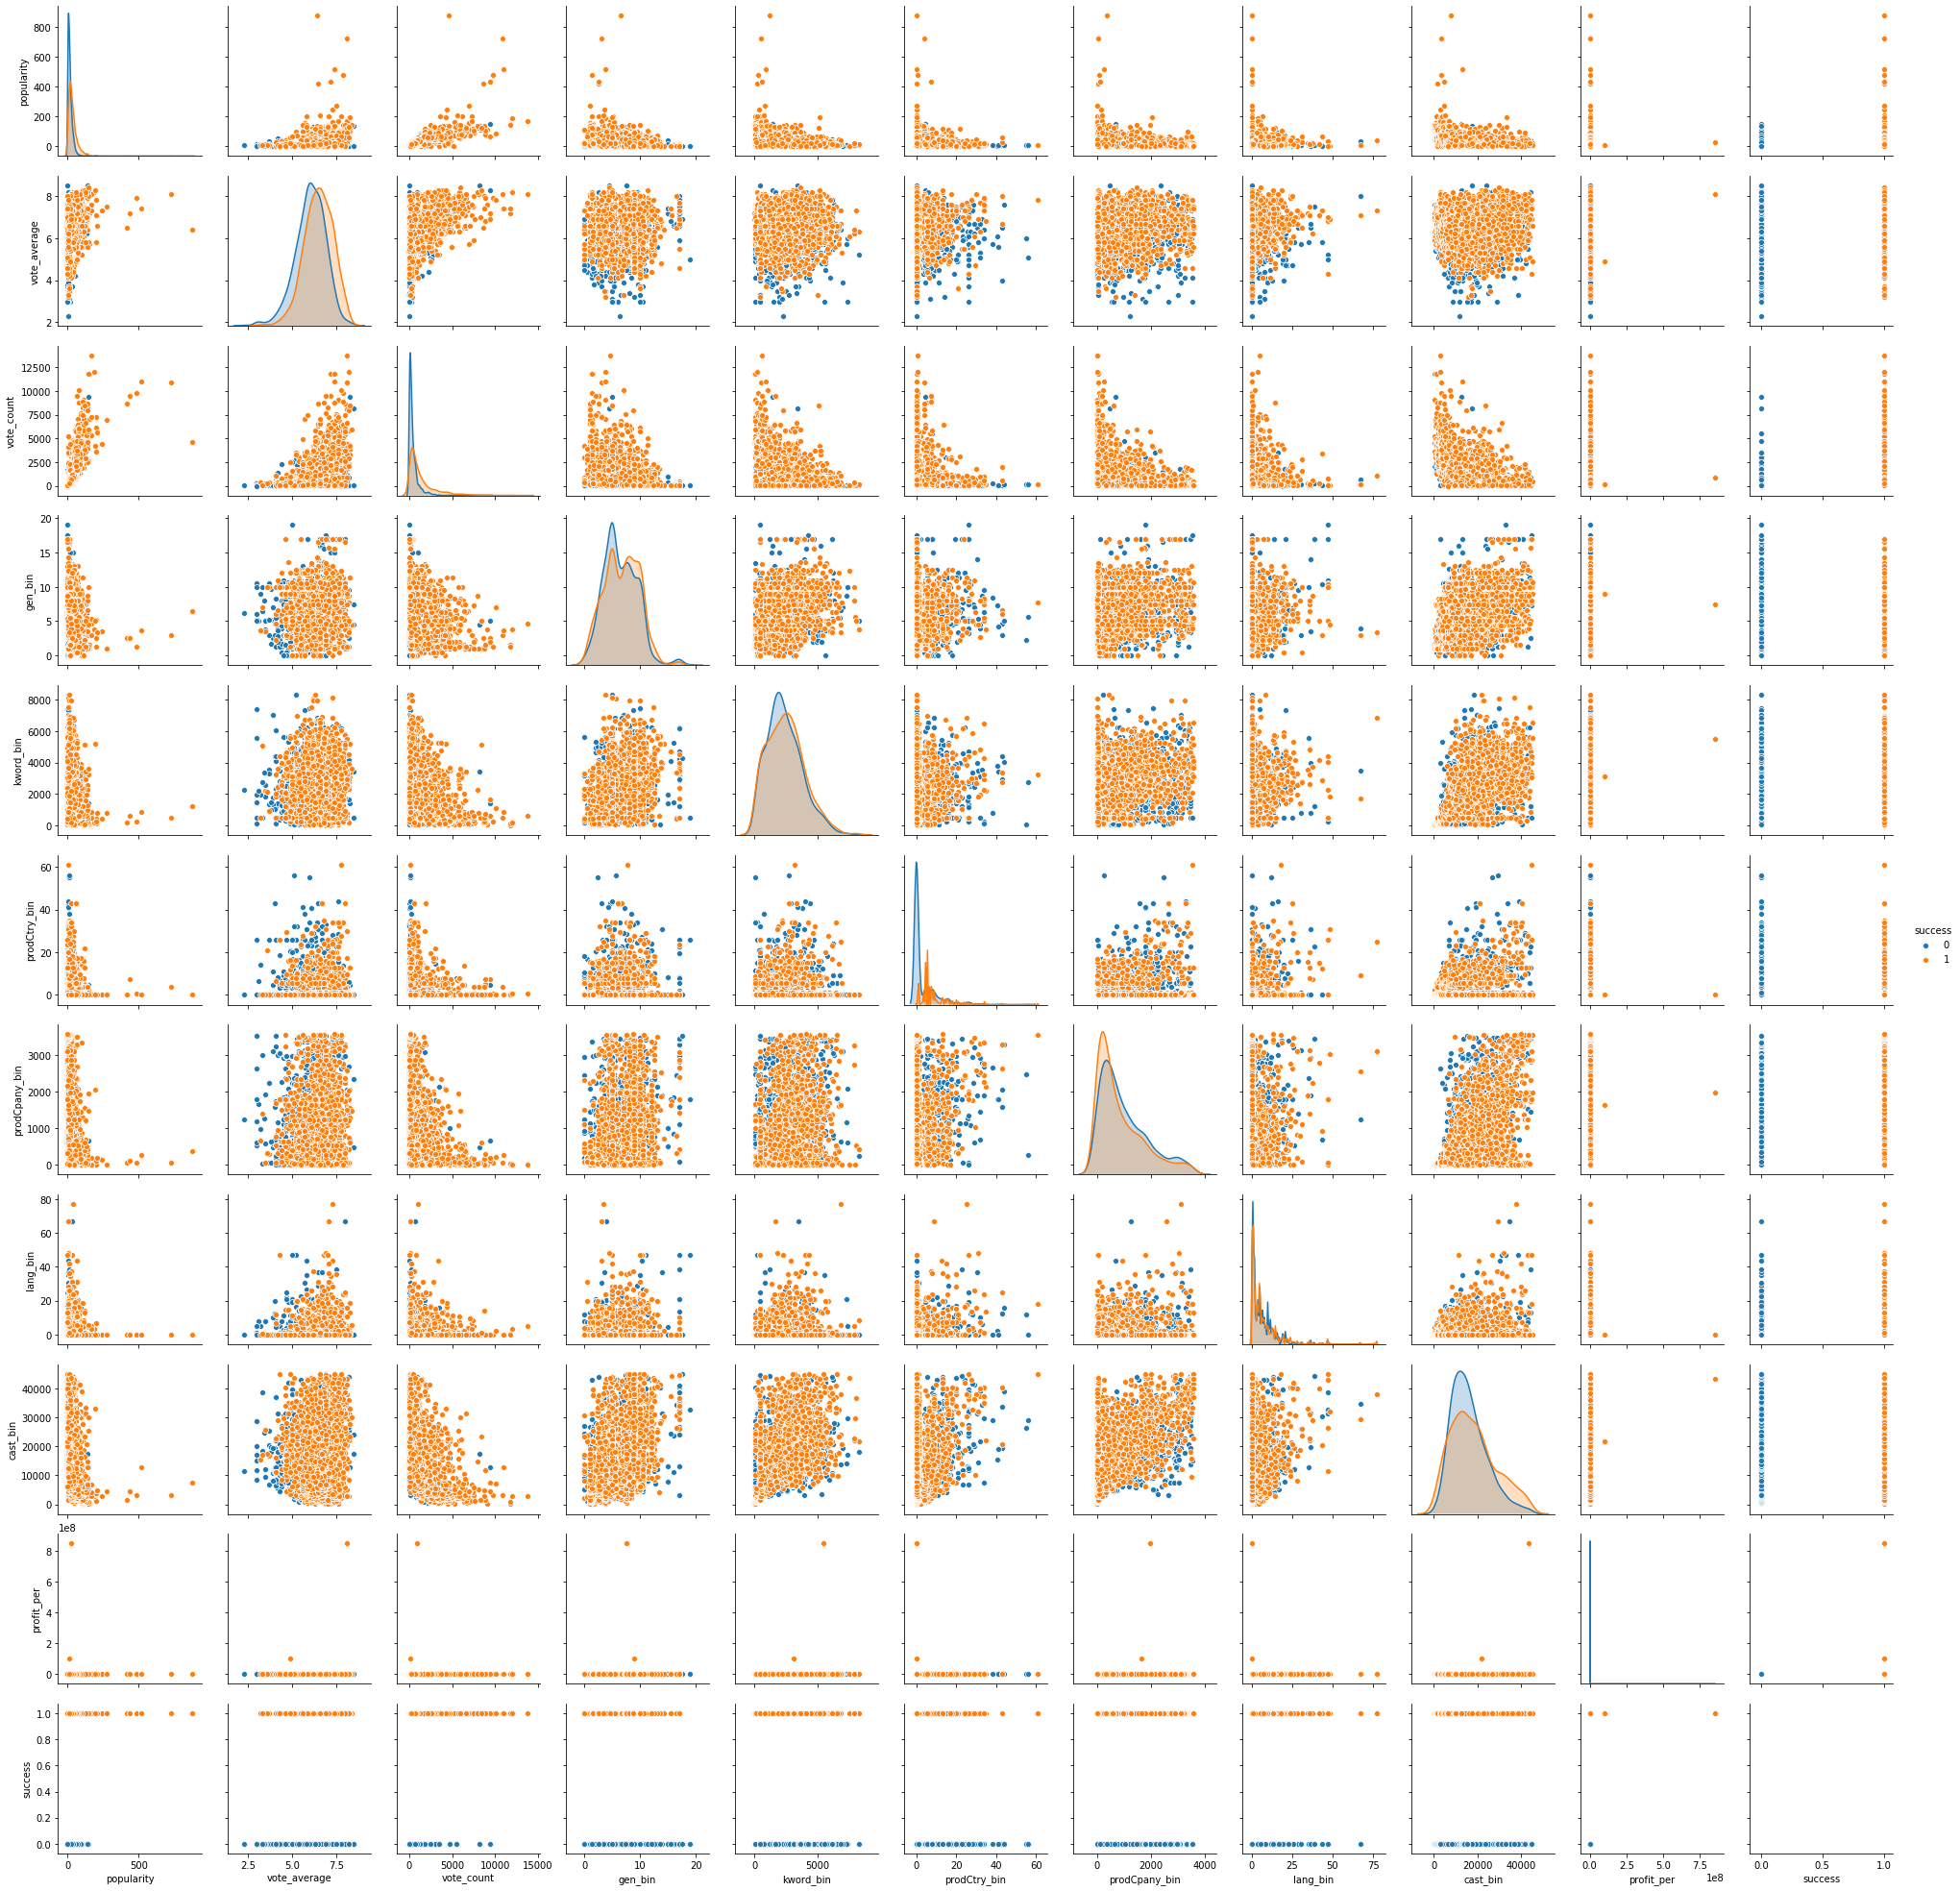

In [33]:
g = sns.pairplot(movies3, size=2.5,hue='success')

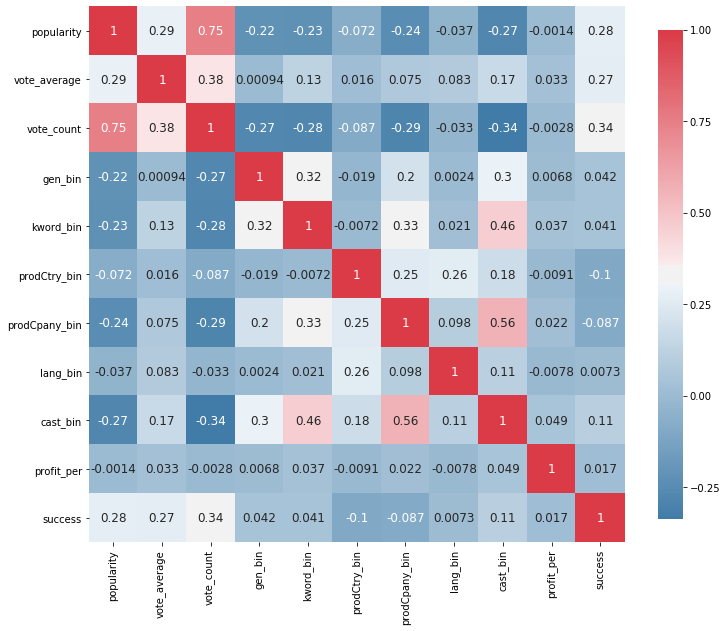

In [34]:
corr = movies3.corr()
_ , ax = plt.subplots( figsize =( 12 , 10 ) )
cmap = sns.diverging_palette( 240 , 10 , as_cmap = True )
_ = sns.heatmap(corr,cmap = cmap,square=True, cbar_kws={ 'shrink' : .9 }, ax=ax, annot = True, annot_kws = { 'fontsize' : 12 })

In [35]:
X=movies3[['popularity', 'vote_average', 'vote_count', 'gen_bin','kword_bin','cast_bin']].values
y=movies3[['success']].values

In [36]:
min_max_scaler = preprocessing.MinMaxScaler()
X_scaled = min_max_scaler.fit_transform(X)

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled,
                                                    y,
                                                    test_size=0.3,
                                                    train_size=0.7,
                                                    random_state=2,
                                                    stratify=y)

In [38]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pylab as pl
import pandas as pd
from sklearn.datasets import make_circles
from matplotlib.colors import Normalize
from time import time


# Función para visualizar un conjunto de datos en 2D
def plot_data(X, y):
    y_unique = np.unique(y)
    colors = pl.cm.rainbow(np.linspace(0.0, 1.0, y_unique.size))
    for this_y, color in zip(y_unique, colors):
        this_X = X[y == this_y]
        pl.scatter(this_X[:, 0], this_X[:, 1],  c=color,
                    alpha=0.5, edgecolor='k',
                    label="Class %s" % this_y)
    pl.legend(loc="best")
    pl.title("Data")
    
# Función para visualizar de la superficie de decisión de un clasificador
def plot_decision_region(X, pred_fun):
    min_x = np.min(X[:, 0])
    max_x = np.max(X[:, 0])
    min_y = np.min(X[:, 1])
    max_y = np.max(X[:, 1])
    min_x = min_x - (max_x - min_x) * 0.05
    max_x = max_x + (max_x - min_x) * 0.05
    min_y = min_y - (max_y - min_y) * 0.05
    max_y = max_y + (max_y - min_y) * 0.05
    x_vals = np.linspace(min_x, max_x, 100)
    y_vals = np.linspace(min_y, max_y, 100)
    XX, YY = np.meshgrid(x_vals, y_vals)
    grid_r, grid_c = XX.shape
    ZZ = np.zeros((grid_r, grid_c))
    for i in range(grid_r):
        for j in range(grid_c):
            ZZ[i, j] = pred_fun(XX[i, j], YY[i, j])
    pl.contourf(XX, YY, ZZ, 100, cmap = pl.cm.coolwarm, vmin= -1, vmax=2)
    pl.colorbar()
    pl.xlabel("x")
    pl.ylabel("y")
    
class MidpointNormalize(Normalize):

    def __init__(self, vmin=None, vmax=None, midpoint=None, clip=False):
        self.midpoint = midpoint
        Normalize.__init__(self, vmin, vmax, clip)

    def __call__(self, value, clip=None):
        x, y = [self.vmin, self.midpoint, self.vmax], [0, 0.5, 1]
        return np.ma.masked_array(np.interp(value, x, y))
    
def gen_pred_fun(clf):
    def pred_fun(x1, x2):
        x = np.array([[x1, x2]])
        return clf.predict(x)[0]
    return pred_fun

def plot_labels(n_folds, n_classes, list_labels):
    ind = np.arange(n_folds)
    width = 0.15
    
    countings = []
    for labels in list_labels:
        labels = np.array(labels)
        countings.append([np.count_nonzero(labels == x) for x in range(n_classes)])
    
    class_bars = []
    for cls in range(n_classes):
        class_bars.append([l[cls] for l in countings])
    
    fig, ax = pl.subplots()
    i = 0
    for class_bar in class_bars:
        ax.bar(ind + width*i, class_bar, width, label='Clase '+str(i))
        i += 1
        
    ax.set_xticks(ind + 2*width / 3)
    ax.set_xticklabels(['Pliegue {}'.format(k) for k in range(n_folds)])
    pl.legend(loc="best")
    pl.title("Etiquetas")

In [39]:
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
total_accuracy = {}
def report_performance(model):

    pred = model.predict(X_test)
    
    accu = metrics.accuracy_score(y_test,pred)
    print("\nAccuracy del Modelo: ",accu)
    total_accuracy[str((str(model).split('(')[0]))] = accu
    
    print('Error de clasificación del Modelo: {}'.format(1 - model.score(X_test, y_test)))

    print("\n Reporte de la Calificacion: ")
    print(metrics.classification_report(y_test, pred))
    
    cm = metrics.confusion_matrix(y_test, pred)
    plt.figure(figsize=(8, 6))
    plt.clf()
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
    classNames = ['No Existoso','Exitoso']
    plt.title('Matriz de Confusion')
    plt.ylabel('Valor Real')
    plt.xlabel('Valor Predicho')
    tick_marks = np.arange(len(classNames))
    plt.xticks(tick_marks,classNames)
    plt.yticks(tick_marks,classNames)
    s = [['TN','FP'], ['FN', 'TP']]
    for i in range(2):
        for j in range(2):
            plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
    plt.show()
    

# Neural Networks

C:\Users\natalia.avendano.pr1\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



Accuracy del Modelo:  0.7409700722394221
Error de clasificación del Modelo: 0.25902992776057787

 Reporte de la Calificacion: 
              precision    recall  f1-score   support

           0       0.73      0.66      0.69       428
           1       0.75      0.80      0.78       541

    accuracy                           0.74       969
   macro avg       0.74      0.73      0.73       969
weighted avg       0.74      0.74      0.74       969



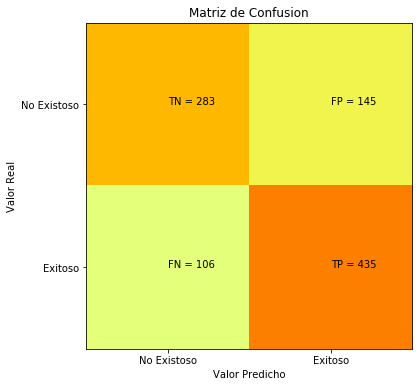

In [40]:
from sklearn.neural_network import MLPClassifier
mlpc = MLPClassifier(solver='lbfgs', alpha=1e-5, activation='tanh',hidden_layer_sizes=(200, 128), random_state=1)
mlpc.fit(X_train,  y_train)

report_performance(mlpc) 

C:\Users\natalia.avendano.pr1\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


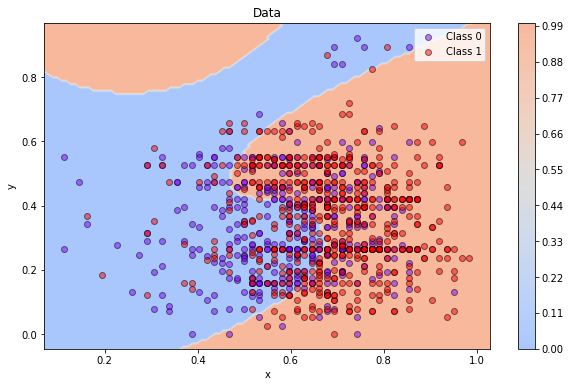

In [41]:
mlpc2 = MLPClassifier(solver='lbfgs', alpha=1e-5, activation='tanh',hidden_layer_sizes=(32, 128), random_state=1)
mlpc2.fit(X_train[:,[1,3]],  y_train)
pl.figure(figsize = (10, 6)) 
plot_decision_region(X_test[:,[1,3]], gen_pred_fun(mlpc2))
plot_data(X_test[:,[1,3]], y_test[:,0])

## SVM

In [50]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

In [130]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

svmc = SVC()
grid = [i for i in range(-4, 5, 1)]
param_grid = {'C': [2**i for i in grid], 
              'gamma': [2**i for i in grid],
             'kernel':['linear', 'rbf'] }
clf = GridSearchCV(svmc, cv=5, param_grid=param_grid, verbose=2)
clf.fit(X_train, y_train.ravel())

Fitting 5 folds for each of 162 candidates, totalling 810 fits
[CV] C=0.0625, gamma=0.0625, kernel=linear ...........................
[CV] ............ C=0.0625, gamma=0.0625, kernel=linear, total=   0.0s
[CV] C=0.0625, gamma=0.0625, kernel=linear ...........................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ............ C=0.0625, gamma=0.0625, kernel=linear, total=   0.0s
[CV] C=0.0625, gamma=0.0625, kernel=linear ...........................
[CV] ............ C=0.0625, gamma=0.0625, kernel=linear, total=   0.0s
[CV] C=0.0625, gamma=0.0625, kernel=linear ...........................
[CV] ............ C=0.0625, gamma=0.0625, kernel=linear, total=   0.0s
[CV] C=0.0625, gamma=0.0625, kernel=linear ...........................
[CV] ............ C=0.0625, gamma=0.0625, kernel=linear, total=   0.0s
[CV] C=0.0625, gamma=0.0625, kernel=rbf ..............................
[CV] ............... C=0.0625, gamma=0.0625, kernel=rbf, total=   0.0s
[CV] C=0.0625, gamma=0.0625, kernel=rbf ..............................
[CV] ............... C=0.0625, gamma=0.0625, kernel=rbf, total=   0.0s
[CV] C=0.0625, gamma=0.0625, kernel=rbf ..............................
[CV] ............... C=0.0625, gamma=0.0625, kernel=rbf, total=   0.0s
[CV] C=0.0625, gamma=0.0625, kernel=rbf ..............................
[CV] .

[CV] .................... C=0.0625, gamma=2, kernel=rbf, total=   0.0s
[CV] C=0.0625, gamma=4, kernel=linear ................................
[CV] ................. C=0.0625, gamma=4, kernel=linear, total=   0.0s
[CV] C=0.0625, gamma=4, kernel=linear ................................
[CV] ................. C=0.0625, gamma=4, kernel=linear, total=   0.0s
[CV] C=0.0625, gamma=4, kernel=linear ................................
[CV] ................. C=0.0625, gamma=4, kernel=linear, total=   0.0s
[CV] C=0.0625, gamma=4, kernel=linear ................................
[CV] ................. C=0.0625, gamma=4, kernel=linear, total=   0.0s
[CV] C=0.0625, gamma=4, kernel=linear ................................
[CV] ................. C=0.0625, gamma=4, kernel=linear, total=   0.0s
[CV] C=0.0625, gamma=4, kernel=rbf ...................................
[CV] .................... C=0.0625, gamma=4, kernel=rbf, total=   0.0s
[CV] C=0.0625, gamma=4, kernel=rbf ...................................
[CV] .

[CV] .................. C=0.125, gamma=0.25, kernel=rbf, total=   0.0s
[CV] C=0.125, gamma=0.25, kernel=rbf .................................
[CV] .................. C=0.125, gamma=0.25, kernel=rbf, total=   0.0s
[CV] C=0.125, gamma=0.25, kernel=rbf .................................
[CV] .................. C=0.125, gamma=0.25, kernel=rbf, total=   0.0s
[CV] C=0.125, gamma=0.5, kernel=linear ...............................
[CV] ................ C=0.125, gamma=0.5, kernel=linear, total=   0.0s
[CV] C=0.125, gamma=0.5, kernel=linear ...............................
[CV] ................ C=0.125, gamma=0.5, kernel=linear, total=   0.0s
[CV] C=0.125, gamma=0.5, kernel=linear ...............................
[CV] ................ C=0.125, gamma=0.5, kernel=linear, total=   0.0s
[CV] C=0.125, gamma=0.5, kernel=linear ...............................
[CV] ................ C=0.125, gamma=0.5, kernel=linear, total=   0.0s
[CV] C=0.125, gamma=0.5, kernel=linear ...............................
[CV] .

[CV] .................... C=0.125, gamma=16, kernel=rbf, total=   0.0s
[CV] C=0.125, gamma=16, kernel=rbf ...................................
[CV] .................... C=0.125, gamma=16, kernel=rbf, total=   0.0s
[CV] C=0.125, gamma=16, kernel=rbf ...................................
[CV] .................... C=0.125, gamma=16, kernel=rbf, total=   0.0s
[CV] C=0.125, gamma=16, kernel=rbf ...................................
[CV] .................... C=0.125, gamma=16, kernel=rbf, total=   0.0s
[CV] C=0.125, gamma=16, kernel=rbf ...................................
[CV] .................... C=0.125, gamma=16, kernel=rbf, total=   0.0s
[CV] C=0.25, gamma=0.0625, kernel=linear .............................
[CV] .............. C=0.25, gamma=0.0625, kernel=linear, total=   0.0s
[CV] C=0.25, gamma=0.0625, kernel=linear .............................
[CV] .............. C=0.25, gamma=0.0625, kernel=linear, total=   0.0s
[CV] C=0.25, gamma=0.0625, kernel=linear .............................
[CV] .

[CV] ...................... C=0.25, gamma=2, kernel=rbf, total=   0.0s
[CV] C=0.25, gamma=2, kernel=rbf .....................................
[CV] ...................... C=0.25, gamma=2, kernel=rbf, total=   0.0s
[CV] C=0.25, gamma=2, kernel=rbf .....................................
[CV] ...................... C=0.25, gamma=2, kernel=rbf, total=   0.0s
[CV] C=0.25, gamma=2, kernel=rbf .....................................
[CV] ...................... C=0.25, gamma=2, kernel=rbf, total=   0.0s
[CV] C=0.25, gamma=2, kernel=rbf .....................................
[CV] ...................... C=0.25, gamma=2, kernel=rbf, total=   0.0s
[CV] C=0.25, gamma=4, kernel=linear ..................................
[CV] ................... C=0.25, gamma=4, kernel=linear, total=   0.0s
[CV] C=0.25, gamma=4, kernel=linear ..................................
[CV] ................... C=0.25, gamma=4, kernel=linear, total=   0.0s
[CV] C=0.25, gamma=4, kernel=linear ..................................
[CV] .

[CV] .................... C=0.5, gamma=0.25, kernel=rbf, total=   0.0s
[CV] C=0.5, gamma=0.25, kernel=rbf ...................................
[CV] .................... C=0.5, gamma=0.25, kernel=rbf, total=   0.0s
[CV] C=0.5, gamma=0.25, kernel=rbf ...................................
[CV] .................... C=0.5, gamma=0.25, kernel=rbf, total=   0.0s
[CV] C=0.5, gamma=0.25, kernel=rbf ...................................
[CV] .................... C=0.5, gamma=0.25, kernel=rbf, total=   0.0s
[CV] C=0.5, gamma=0.25, kernel=rbf ...................................
[CV] .................... C=0.5, gamma=0.25, kernel=rbf, total=   0.0s
[CV] C=0.5, gamma=0.5, kernel=linear .................................
[CV] .................. C=0.5, gamma=0.5, kernel=linear, total=   0.0s
[CV] C=0.5, gamma=0.5, kernel=linear .................................
[CV] .................. C=0.5, gamma=0.5, kernel=linear, total=   0.0s
[CV] C=0.5, gamma=0.5, kernel=linear .................................
[CV] .

[CV] ...................... C=0.5, gamma=16, kernel=rbf, total=   0.0s
[CV] C=0.5, gamma=16, kernel=rbf .....................................
[CV] ...................... C=0.5, gamma=16, kernel=rbf, total=   0.0s
[CV] C=0.5, gamma=16, kernel=rbf .....................................
[CV] ...................... C=0.5, gamma=16, kernel=rbf, total=   0.0s
[CV] C=0.5, gamma=16, kernel=rbf .....................................
[CV] ...................... C=0.5, gamma=16, kernel=rbf, total=   0.0s
[CV] C=0.5, gamma=16, kernel=rbf .....................................
[CV] ...................... C=0.5, gamma=16, kernel=rbf, total=   0.0s
[CV] C=1, gamma=0.0625, kernel=linear ................................
[CV] ................. C=1, gamma=0.0625, kernel=linear, total=   0.0s
[CV] C=1, gamma=0.0625, kernel=linear ................................
[CV] ................. C=1, gamma=0.0625, kernel=linear, total=   0.0s
[CV] C=1, gamma=0.0625, kernel=linear ................................
[CV] .

[CV] ......................... C=1, gamma=2, kernel=rbf, total=   0.0s
[CV] C=1, gamma=2, kernel=rbf ........................................
[CV] ......................... C=1, gamma=2, kernel=rbf, total=   0.0s
[CV] C=1, gamma=2, kernel=rbf ........................................
[CV] ......................... C=1, gamma=2, kernel=rbf, total=   0.0s
[CV] C=1, gamma=2, kernel=rbf ........................................
[CV] ......................... C=1, gamma=2, kernel=rbf, total=   0.0s
[CV] C=1, gamma=2, kernel=rbf ........................................
[CV] ......................... C=1, gamma=2, kernel=rbf, total=   0.0s
[CV] C=1, gamma=4, kernel=linear .....................................
[CV] ...................... C=1, gamma=4, kernel=linear, total=   0.0s
[CV] C=1, gamma=4, kernel=linear .....................................
[CV] ...................... C=1, gamma=4, kernel=linear, total=   0.0s
[CV] C=1, gamma=4, kernel=linear .....................................
[CV] .

[CV] ...................... C=2, gamma=0.25, kernel=rbf, total=   0.0s
[CV] C=2, gamma=0.25, kernel=rbf .....................................
[CV] ...................... C=2, gamma=0.25, kernel=rbf, total=   0.0s
[CV] C=2, gamma=0.25, kernel=rbf .....................................
[CV] ...................... C=2, gamma=0.25, kernel=rbf, total=   0.0s
[CV] C=2, gamma=0.25, kernel=rbf .....................................
[CV] ...................... C=2, gamma=0.25, kernel=rbf, total=   0.0s
[CV] C=2, gamma=0.25, kernel=rbf .....................................
[CV] ...................... C=2, gamma=0.25, kernel=rbf, total=   0.0s
[CV] C=2, gamma=0.5, kernel=linear ...................................
[CV] .................... C=2, gamma=0.5, kernel=linear, total=   0.0s
[CV] C=2, gamma=0.5, kernel=linear ...................................
[CV] .................... C=2, gamma=0.5, kernel=linear, total=   0.0s
[CV] C=2, gamma=0.5, kernel=linear ...................................
[CV] .

[CV] ..................... C=2, gamma=16, kernel=linear, total=   0.0s
[CV] C=2, gamma=16, kernel=rbf .......................................
[CV] ........................ C=2, gamma=16, kernel=rbf, total=   0.0s
[CV] C=2, gamma=16, kernel=rbf .......................................
[CV] ........................ C=2, gamma=16, kernel=rbf, total=   0.1s
[CV] C=2, gamma=16, kernel=rbf .......................................
[CV] ........................ C=2, gamma=16, kernel=rbf, total=   0.0s
[CV] C=2, gamma=16, kernel=rbf .......................................
[CV] ........................ C=2, gamma=16, kernel=rbf, total=   0.0s
[CV] C=2, gamma=16, kernel=rbf .......................................
[CV] ........................ C=2, gamma=16, kernel=rbf, total=   0.0s
[CV] C=4, gamma=0.0625, kernel=linear ................................
[CV] ................. C=4, gamma=0.0625, kernel=linear, total=   0.0s
[CV] C=4, gamma=0.0625, kernel=linear ................................
[CV] .

[CV] ...................... C=4, gamma=2, kernel=linear, total=   0.0s
[CV] C=4, gamma=2, kernel=linear .....................................
[CV] ...................... C=4, gamma=2, kernel=linear, total=   0.0s
[CV] C=4, gamma=2, kernel=linear .....................................
[CV] ...................... C=4, gamma=2, kernel=linear, total=   0.0s
[CV] C=4, gamma=2, kernel=rbf ........................................
[CV] ......................... C=4, gamma=2, kernel=rbf, total=   0.0s
[CV] C=4, gamma=2, kernel=rbf ........................................
[CV] ......................... C=4, gamma=2, kernel=rbf, total=   0.0s
[CV] C=4, gamma=2, kernel=rbf ........................................
[CV] ......................... C=4, gamma=2, kernel=rbf, total=   0.0s
[CV] C=4, gamma=2, kernel=rbf ........................................
[CV] ......................... C=4, gamma=2, kernel=rbf, total=   0.0s
[CV] C=4, gamma=2, kernel=rbf ........................................
[CV] .

[CV] ................... C=8, gamma=0.25, kernel=linear, total=   0.0s
[CV] C=8, gamma=0.25, kernel=linear ..................................
[CV] ................... C=8, gamma=0.25, kernel=linear, total=   0.0s
[CV] C=8, gamma=0.25, kernel=linear ..................................
[CV] ................... C=8, gamma=0.25, kernel=linear, total=   0.0s
[CV] C=8, gamma=0.25, kernel=rbf .....................................
[CV] ...................... C=8, gamma=0.25, kernel=rbf, total=   0.0s
[CV] C=8, gamma=0.25, kernel=rbf .....................................
[CV] ...................... C=8, gamma=0.25, kernel=rbf, total=   0.0s
[CV] C=8, gamma=0.25, kernel=rbf .....................................
[CV] ...................... C=8, gamma=0.25, kernel=rbf, total=   0.0s
[CV] C=8, gamma=0.25, kernel=rbf .....................................
[CV] ...................... C=8, gamma=0.25, kernel=rbf, total=   0.0s
[CV] C=8, gamma=0.25, kernel=rbf .....................................
[CV] .

[CV] ..................... C=8, gamma=16, kernel=linear, total=   0.0s
[CV] C=8, gamma=16, kernel=linear ....................................
[CV] ..................... C=8, gamma=16, kernel=linear, total=   0.0s
[CV] C=8, gamma=16, kernel=linear ....................................
[CV] ..................... C=8, gamma=16, kernel=linear, total=   0.0s
[CV] C=8, gamma=16, kernel=rbf .......................................
[CV] ........................ C=8, gamma=16, kernel=rbf, total=   0.0s
[CV] C=8, gamma=16, kernel=rbf .......................................
[CV] ........................ C=8, gamma=16, kernel=rbf, total=   0.0s
[CV] C=8, gamma=16, kernel=rbf .......................................
[CV] ........................ C=8, gamma=16, kernel=rbf, total=   0.0s
[CV] C=8, gamma=16, kernel=rbf .......................................
[CV] ........................ C=8, gamma=16, kernel=rbf, total=   0.0s
[CV] C=8, gamma=16, kernel=rbf .......................................
[CV] .

[CV] ..................... C=16, gamma=2, kernel=linear, total=   0.0s
[CV] C=16, gamma=2, kernel=linear ....................................
[CV] ..................... C=16, gamma=2, kernel=linear, total=   0.0s
[CV] C=16, gamma=2, kernel=linear ....................................
[CV] ..................... C=16, gamma=2, kernel=linear, total=   0.0s
[CV] C=16, gamma=2, kernel=rbf .......................................
[CV] ........................ C=16, gamma=2, kernel=rbf, total=   0.0s
[CV] C=16, gamma=2, kernel=rbf .......................................
[CV] ........................ C=16, gamma=2, kernel=rbf, total=   0.0s
[CV] C=16, gamma=2, kernel=rbf .......................................
[CV] ........................ C=16, gamma=2, kernel=rbf, total=   0.0s
[CV] C=16, gamma=2, kernel=rbf .......................................
[CV] ........................ C=16, gamma=2, kernel=rbf, total=   0.0s
[CV] C=16, gamma=2, kernel=rbf .......................................
[CV] .

[Parallel(n_jobs=1)]: Done 810 out of 810 | elapsed:  1.6min finished


GridSearchCV(cv=5, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.0625, 0.125, 0.25, 0.5, 1, 2, 4, 8, 16], 'gamma': [0.0625, 0.125, 0.25, 0.5, 1, 2, 4, 8, 16], 'kernel': ['linear', 'rbf']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=2)

In [131]:
print('Best Parameters: {}'.format(clf.best_params_))
print('Best Score: {}'.format(clf.best_score_))

Best Parameters: {'C': 8, 'gamma': 8, 'kernel': 'rbf'}
Best Score: 0.7426926483613817


C:\Users\Natalia\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



Accuracy del Modelo:  0.7234262125902993
Error de clasificación del Modelo: 0.27657378740970073

 Reporte de la Calificacion: 
             precision    recall  f1-score   support

          0       0.69      0.69      0.69       428
          1       0.75      0.75      0.75       541

avg / total       0.72      0.72      0.72       969



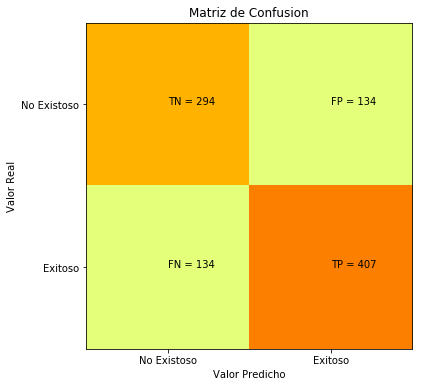

In [132]:
svmc=SVC(C= 8, gamma= 8, kernel= 'rbf')
svmc.fit(X_train, y_train)
report_performance(svmc) 

C:\Users\natalia.avendano.pr1\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


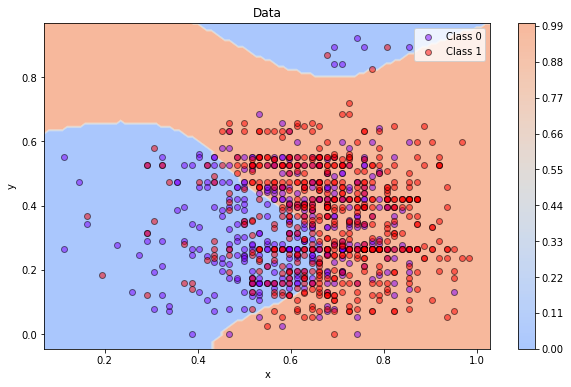

In [51]:
svmc2=SVC(C= 8, gamma= 8, kernel= 'rbf')
svmc2.fit(X_train[:,[1,3]],  y_train)
pl.figure(figsize = (10, 6)) 
plot_decision_region(X_test[:,[1,3]], gen_pred_fun(svmc2))
plot_data(X_test[:,[1,3]], y_test[:,0])

## Random Forest

In [48]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import uniform 
from scipy.stats import randint

rfc=RandomForestClassifier()

In [133]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import uniform 
from scipy.stats import randint

rfc=RandomForestClassifier()

param_dist = { 
    'n_estimators': randint(20, 500),
    'max_features': ['auto','log2',None],
    'max_depth' : [4,5,6,7,8,9,None],
    'bootstrap':[True,False]}
n_iter_search = 25
RS_rfc = RandomizedSearchCV(rfc, param_distributions=param_dist,
                                   n_iter=n_iter_search, cv=5, 
                                   n_jobs=-1, verbose=2)
RS_rfc.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   28.2s
[Parallel(n_jobs=-1)]: Done 125 out of 125 | elapsed:  1.3min finished
C:\Users\Natalia\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:739: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


RandomizedSearchCV(cv=5, error_score='raise',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
          fit_params=None, iid=True, n_iter=25, n_jobs=-1,
          param_distributions={'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000023C4893A5C0>, 'max_features': ['auto', 'log2', None], 'max_depth': [4, 5, 6, 7, 8, 9, None], 'bootstrap': [True, False]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring=None, verbose=2)

In [134]:
print('Best Parameters: {}'.format(RS_rfc.best_params_))
print('Best Score: {}'.format(RS_rfc.best_score_))

Best Parameters: {'bootstrap': True, 'max_depth': 7, 'max_features': None, 'n_estimators': 206}
Best Score: 0.745792736935341


C:\Users\Natalia\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  



Accuracy del Modelo:  0.7306501547987616
Error de clasificación del Modelo: 0.2693498452012384

 Reporte de la Calificacion: 
             precision    recall  f1-score   support

          0       0.71      0.67      0.69       428
          1       0.75      0.78      0.76       541

avg / total       0.73      0.73      0.73       969



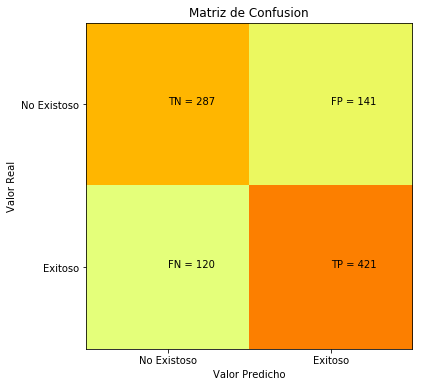

In [135]:
rfc=RandomForestClassifier(max_depth=7,max_features=None,n_estimators=156,bootstrap=True)
rfc.fit(X_train, y_train)
report_performance(rfc) 

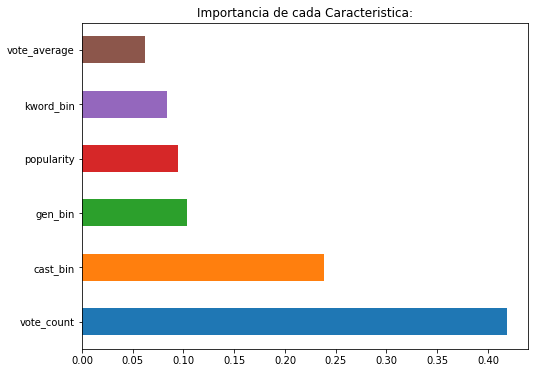

In [136]:
plt.figure(figsize=(8, 6))
feat_importances = pd.Series(rfc.feature_importances_, index=['popularity', 'vote_average', 'vote_count', 'gen_bin','kword_bin','cast_bin'])
feat_importances.nlargest(9).plot(kind='barh')
plt.title("Importancia de cada Caracteristica:")
plt.show()

C:\Users\natalia.avendano.pr1\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


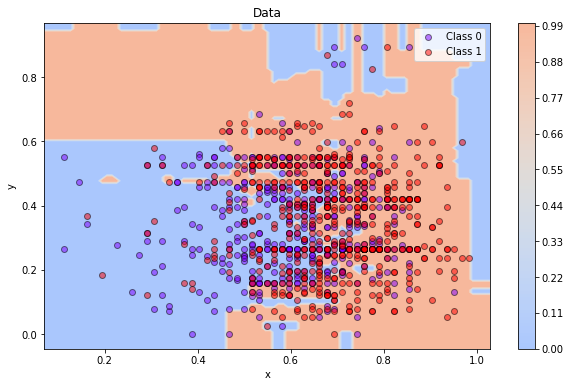

In [49]:
rfc2=RandomForestClassifier(max_depth=7,max_features=None,n_estimators=156,bootstrap=True)
rfc2.fit(X_train[:,[1,3]],  y_train)
pl.figure(figsize = (10, 6)) 
plot_decision_region(X_test[:,[1,3]], gen_pred_fun(rfc2))
plot_data(X_test[:,[1,3]], y_test[:,0])

## Clustering

In [138]:
from sklearn.cluster import KMeans, SpectralClustering, AgglomerativeClustering, DBSCAN
n_clusters = 2

km = KMeans( n_clusters=n_clusters)
km.fit(X)
y2 = km.predict(X)

In [139]:
pd.Series(y2).value_counts()

0    2135
1    1092
dtype: int64

In [140]:
km.cluster_centers_

array([[3.34474903e+01, 6.20893776e+00, 1.17741507e+03, 6.18124206e+00,
        2.11821547e+03, 1.16866249e+04],
       [2.04329134e+01, 6.51779817e+00, 5.86720183e+02, 7.43483180e+00,
        3.17321138e+03, 2.83201761e+04]])

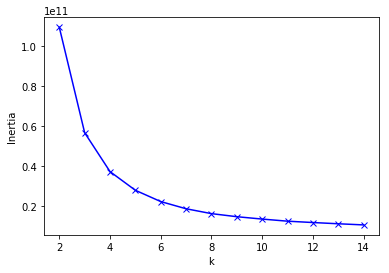

In [141]:
Sum_of_squared_distances = []
K = range(2,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(X)
    Sum_of_squared_distances.append(km.inertia_)
    
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.show()

In [142]:
from sklearn.metrics import silhouette_score

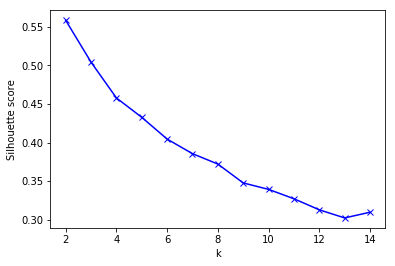

In [143]:
silhouette_scores = []
K = range(2,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(X)
    y = km.predict(X)
    silhouette_scores.append(silhouette_score(X, y))
    
plt.plot(K, silhouette_scores, 'bx-')
plt.xlabel('k')
plt.ylabel('Silhouette score')
plt.show()

Text(0,0.5,'Y')

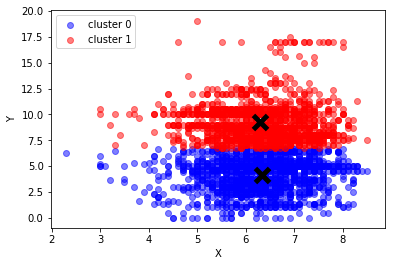

In [144]:
n_clusters = 2
km3 = KMeans( n_clusters=n_clusters)
X3=X[:,[1,3]]
km3.fit(X3)
y3 = km3.predict(X3)
cmap = plt.cm.plasma

cmap((y3*255./(n_clusters-1)).astype(int))
for i in np.unique(y3):
    cmap = plt.cm.bwr
    col = cmap((i*255./(n_clusters-1)).astype(int))
    Xr = X3[y3==i]
    plt.scatter(Xr[:,0], Xr[:,1], color=col, label="cluster %d"%i, alpha=.5)
plt.scatter(km3.cluster_centers_[:,0], km3.cluster_centers_[:,1],marker="x", lw=5, s=200, color="black")
plt.legend()    
plt.xlabel("X")
plt.ylabel("Y")

Text(0,0.5,'Y')

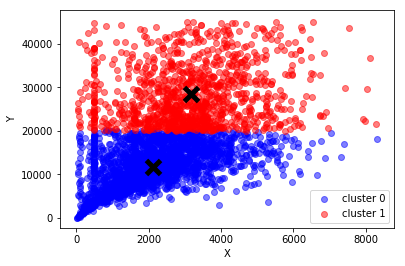

In [148]:
n_clusters = 2
km3 = KMeans( n_clusters=n_clusters)
X3=X[:,[4,5]]
km3.fit(X3)
y3 = km3.predict(X3)
cmap = plt.cm.plasma

cmap((y3*255./(n_clusters-1)).astype(int))
for i in np.unique(y3):
    cmap = plt.cm.bwr
    col = cmap((i*255./(n_clusters-1)).astype(int))
    Xr = X3[y3==i]
    plt.scatter(Xr[:,0], Xr[:,1], color=col, label="cluster %d"%i, alpha=.5)
plt.scatter(km3.cluster_centers_[:,0], km3.cluster_centers_[:,1],marker="x", lw=5, s=200, color="black")
plt.legend()    
plt.xlabel("X")
plt.ylabel("Y")

## PCA

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2) 
pca.fit(X)

In [150]:
sklearn_pca = PCA(n_components=None)
sklearn_transf = sklearn_pca.fit_transform(X)
varianza_expl = sklearn_pca.explained_variance_ratio_
varianza_expl

array([9.64730288e-01, 2.02316955e-02, 1.50319628e-02, 5.96585039e-06,
       8.17967688e-08, 5.68527405e-09])

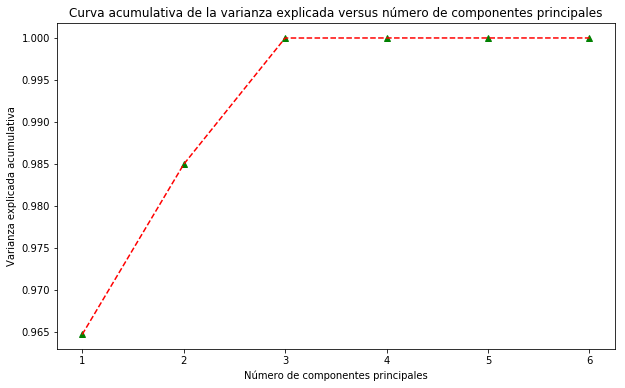

In [151]:
cum_var_exp = np.cumsum(varianza_expl)
plt.figure(figsize = (10, 6))
plt.xlabel('Número de componentes principales')
plt.ylabel('Varianza explicada acumulativa')
plt.title('Curva acumulativa de la varianza explicada versus número de componentes principales')
nc = np.arange(1, varianza_expl.shape[0] + 1)
plt.plot(nc, cum_var_exp, 'g^')
plt.plot(nc, cum_var_exp, '--r')
plt.show()

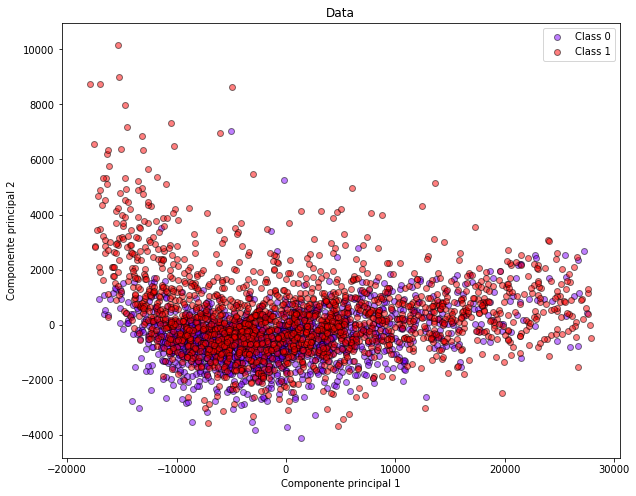

In [152]:
from sklearn.cross_validation import train_test_split
from sklearn.decomposition import PCA

labels = movies3['success']

sklearn_pca = PCA(n_components=3)
sklearn_transf = sklearn_pca.fit_transform(X)
plt.figure(figsize = (10, 8))
plt.xlabel('Componente principal 1')
plt.ylabel('Componente principal 2')
plt.title('Vectores singulares más significativos después de la transformación lineal a través de PCA')
plot_data(sklearn_transf,labels)

## Evolución Temporal

In [42]:
movies2['release_date']=pd.to_datetime(movies2['release_date'])
movies2['year']=movies2['release_date'].dt.year.apply(str)

In [43]:
df = movies2[movies2['success']==0]
df2 = movies2[movies2['success']==1]


df3 = pd.DataFrame()
df3['no_success'] = df['year'].value_counts()
df3.reset_index(inplace=True)

df4 = pd.DataFrame()
df4['success'] = df2['year'].value_counts()
df4.reset_index(inplace=True)

df5 = pd.DataFrame()
df5['total'] = movies2['year'].value_counts()
df5.reset_index(inplace=True)

df=df4.merge(df3,left_on='index',right_on='index',how='left')
df=df.merge(df5,left_on='index',right_on='index',how='left')
df.sort_values(by=['index'], inplace = True)
df.fillna(0, inplace = True)
df.reset_index(inplace=True)
df.drop(columns=['level_0'], inplace = True)
df['perc'] = round(abs(df['success']-df['no_success'])/df['success']*100)

In [44]:
df.head()

,index,success,no_success,total,perc
0,1916,1,0.0,1,100.0
1,1925,1,0.0,1,100.0
2,1929,1,0.0,1,100.0
3,1930,1,0.0,1,100.0
4,1932,1,0.0,1,100.0


In [45]:
df[df['success']<df['no_success']]

,index,success,no_success,total,perc
41,1970,4,5.0,9,25.0
64,1993,16,19.0,35,19.0
69,1998,38,50.0,88,32.0
70,1999,43,62.0,105,44.0
71,2000,51,56.0,107,10.0
72,2001,53,69.0,122,30.0
73,2002,65,66.0,131,2.0
76,2005,68,75.0,143,10.0
77,2006,77,86.0,163,12.0
80,2009,71,83.0,154,17.0


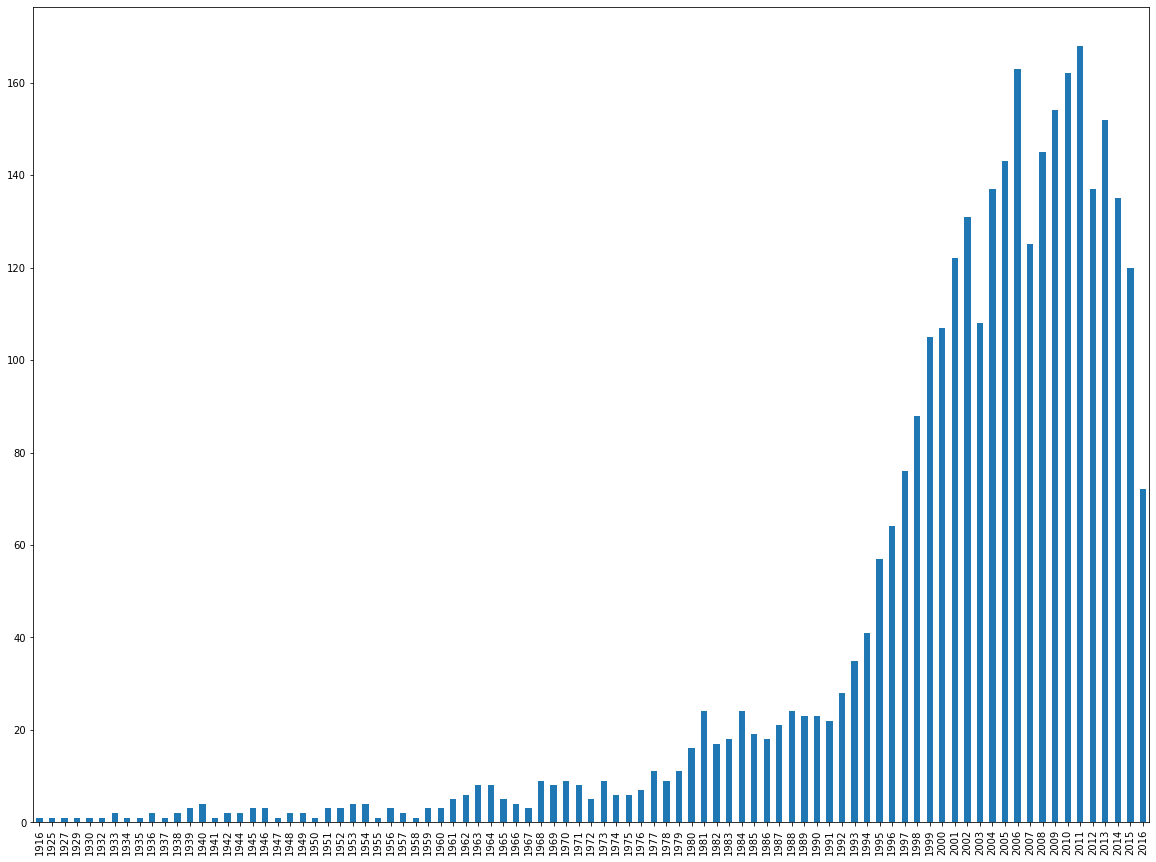

In [46]:
plt.subplots(figsize=(20,15))
t=movies2['year'].unique().tolist()
t.sort()
movies2['year'].value_counts(sort=False).reindex(t).plot.bar()

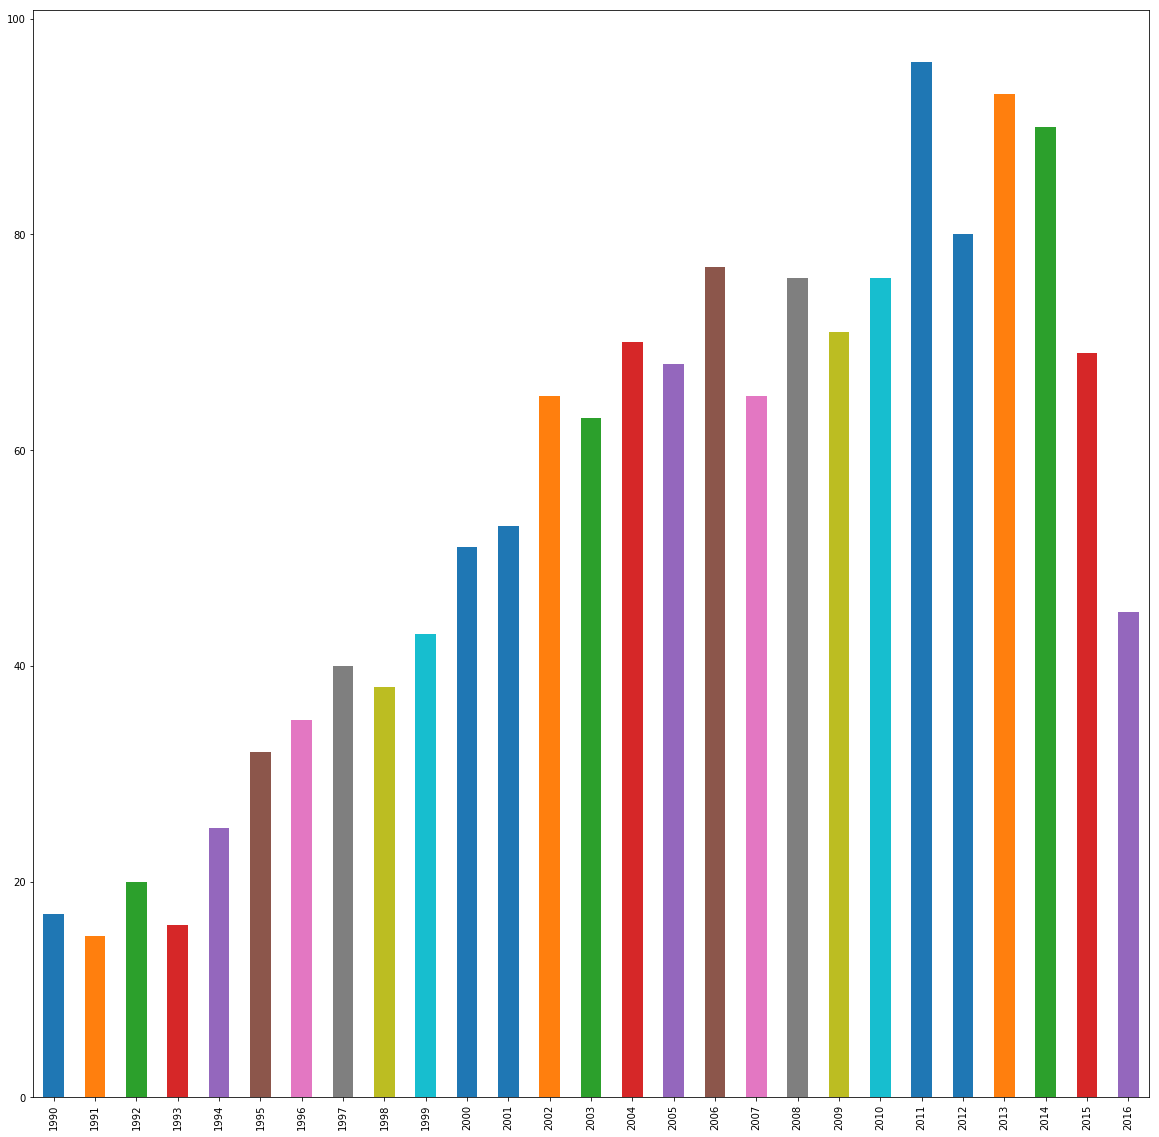

In [82]:
plt.subplots(figsize=(20,20))
t=movies2['year'].unique().tolist()
t.sort()
t = sorted(i for i in t if i >= '1990')
df = movies2[movies2['success']==1]
df['year'].value_counts(sort=False).reindex(t).plot.bar()

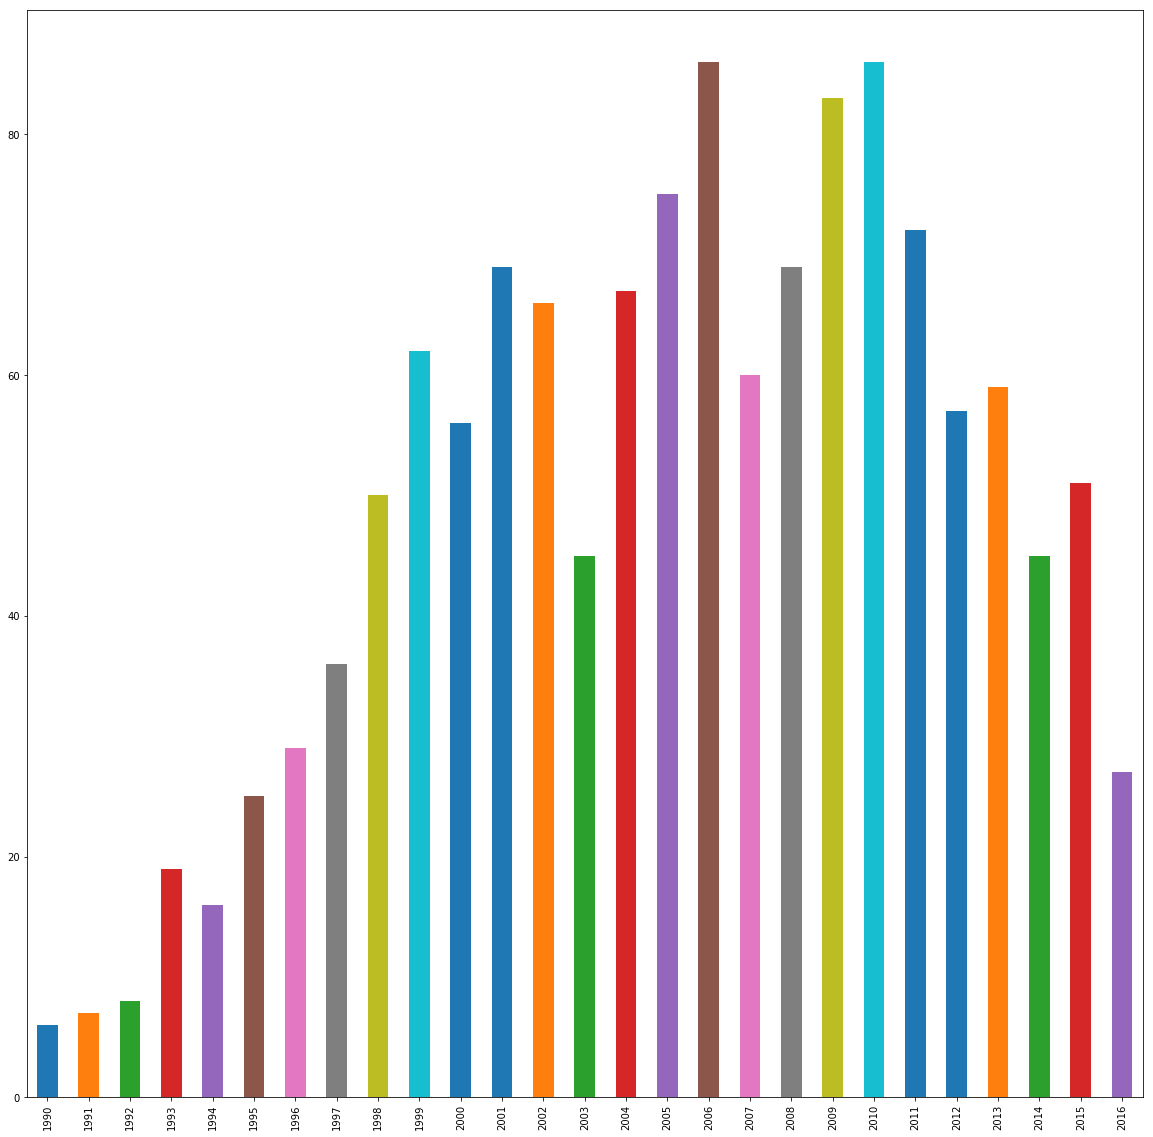

In [83]:
plt.subplots(figsize=(20,20))
t=movies2['year'].unique().tolist()
t.sort()
t = sorted(i for i in t if i >= '1990')
df = movies2[movies2['success']==0]
df['year'].value_counts(sort=False).reindex(t).plot.bar()